In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [52]:
# Load the CSV data into a Pandas DataFrame
data = pd.read_csv("./data/preprocessed_data.csv")
data.head()

,User,Handle,PostDate,TweetText,ReplyCount,RetweetCount,LikeCount,PreprocessedTweet,SentimentScore
0,Robert Carter,@Bob_cart124,2023-07-25T18:33:02.000Z,Robert Carter\n@Bob_cart124\n·\nJul 25SHOCKING...,1204,5908,10400,robert carter shock brave dane attempt save ou...,0.375000
1,MEHREEN IQBAL,@Iqbalmehree,2023-07-26T12:48:00.000Z,MEHREEN IQBAL\n@Iqbalmehree\n·\nJul 26After #M...,31,79,83,mehreen equal manipurviol bengalviol biharviol...,0.100000
2,Robert Carter,@Bob_cart124,2023-07-31T09:37:02.000Z,Robert Carter\n@Bob_cart124\n·\nJul 31SUCCESS!...,61,207,884,robert carter success due global muslin danish...,-0.004167
3,Mohamad Al Shami,@mamashami,2023-07-26T20:10:16.000Z,Mohamad Al Shami\n@mamashami\n·\nJul 27A woman...,2,17,24,mohamad al shame said use regime combine try s...,0.000000
4,smile2jannah,@smile2jannah,2023-07-30T16:33:31.000Z,smile2jannah\n@smile2jannah\n·\nJul 30Atheist ...,21,81,425,atheist hiram origin surprise answer muslin sl...,0.000000


In [47]:

data['indTweet'] = data['PreprocessedTweet'].apply(lambda x: ' '.join(x.split()[:3]))
# Calculate Engagement Rate (ER)
data['ER'] = (data['LikeCount'] + data['RetweetCount']) / data.shape[0]
print(data['ER'])
# Calculate Average Likes per Tweet
average_likes_per_tweet = data['LikeCount'].mean()
print(average_likes_per_tweet)
# Calculate Average Reshares per Tweet
average_reshares_per_tweet = data['RetweetCount'].mean()
print(average_reshares_per_tweet)
# Identify Most Liked Tweets
most_liked_tweets = data.nlargest(10, 'LikeCount')[['indTweet', 'LikeCount']]
print(most_liked_tweets)
# Identify Most Shared (Retweeted) Tweets
most_shared_tweets = data.nlargest(10, 'RetweetCount')[['indTweet', 'RetweetCount']]
print(most_shared_tweets)

# Sentiment Classification based on thresholding
sentiment_column = 'SentimentScore'
data['Sentiment'] = data[sentiment_column].apply(
    lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))
print(data.head())

0      131.516129
1        1.306452
2        8.798387
3        0.330645
4        4.080645
          ...    
119      0.000000
120      0.000000
121      0.056452
122      0.475806
123      0.008065
Name: ER, Length: 124, dtype: float64
531.0403225806451
145.73387096774192
                   indTweet  LikeCount
0       robert carter shock      10400
7           one great among       4569
9            sure come sure       3930
21           lord punish us       3428
22  lord certainly almighty       3394
27                lord save       3084
59     origin heaven decree       2686
29         kill proved sure       2375
8        tell believe lower       2369
62    avoid major forbidden       2325
                   indTweet  RetweetCount
0       robert carter shock          5908
9            sure come sure           944
7           one great among           662
21           lord punish us           662
22  lord certainly almighty           650
59     origin heaven decree           592
27  

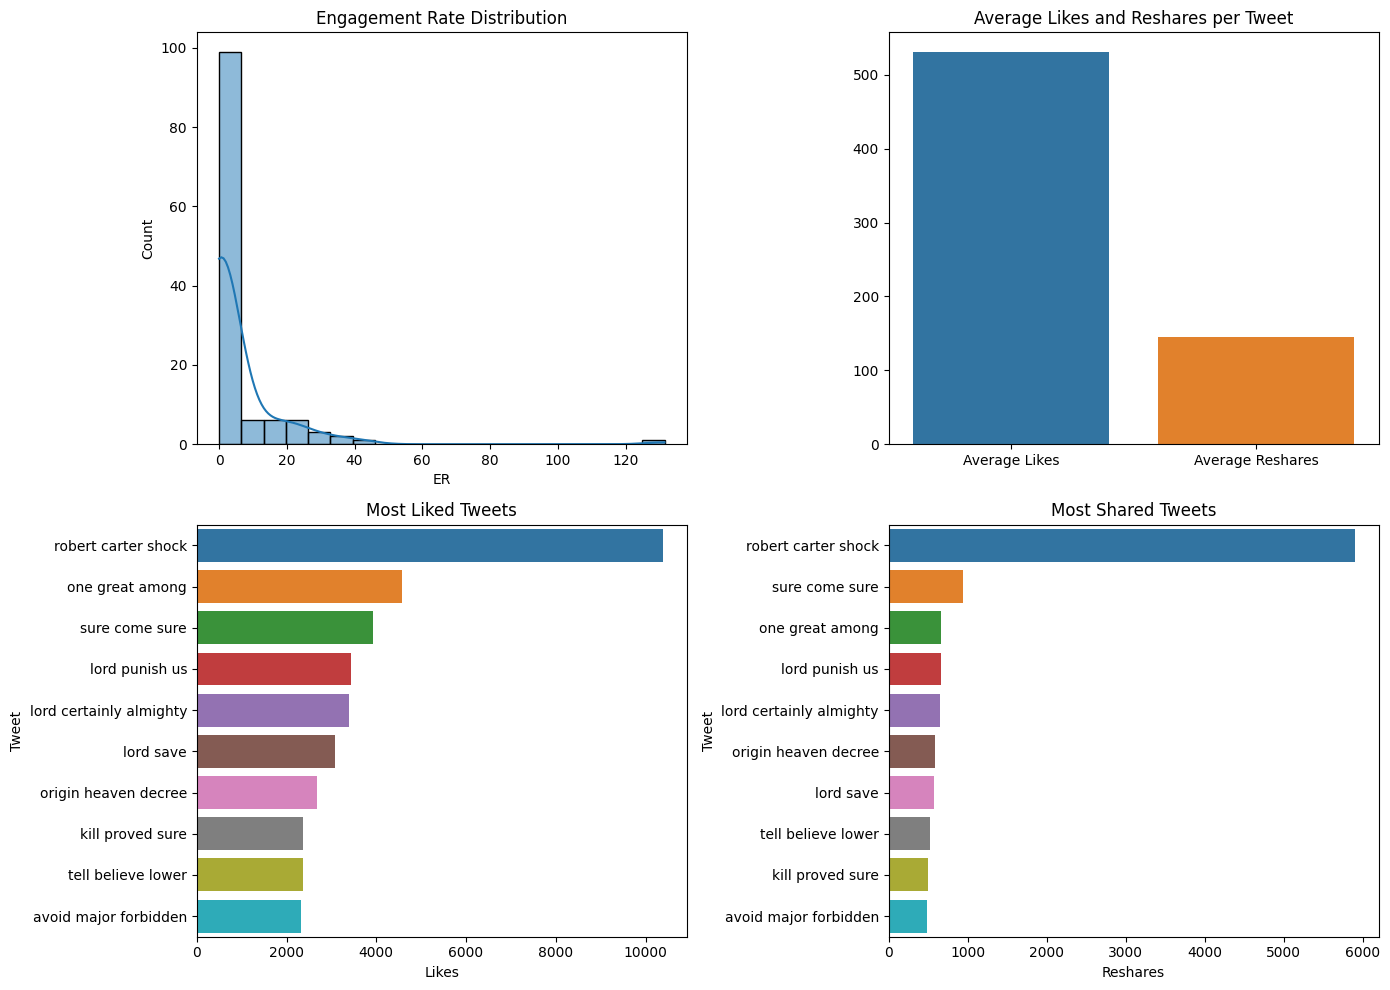


Sentiment Analysis:
Positive    63
Neutral     50
Negative    11
Name: Sentiment, dtype: int64


In [48]:
plt.figure(figsize=(14, 10))

# Subplot 1: Engagement Rate
plt.subplot(2, 2, 1)
sns.histplot(data['ER'], bins=20, kde=True)
plt.title('Engagement Rate Distribution')

# Subplot 2: Average Likes and Reshares per Tweet
plt.subplot(2, 2, 2)
sns.barplot(x=['Average Likes', 'Average Reshares'], y=[average_likes_per_tweet, average_reshares_per_tweet])
plt.title('Average Likes and Reshares per Tweet')

# Subplot 3: Most Liked Tweets
plt.subplot(2, 2, 3)
sns.barplot(x='LikeCount', y='indTweet', data=most_liked_tweets)
plt.xlabel('Likes')
plt.ylabel('Tweet')
plt.title('Most Liked Tweets')

# Subplot 4: Most Shared (Retweeted) Tweets
plt.subplot(2, 2, 4)
sns.barplot(x='RetweetCount', y='indTweet', data=most_shared_tweets)
plt.xlabel('Reshares')
plt.ylabel('Tweet')
plt.title('Most Shared Tweets')

plt.tight_layout()
plt.show()

# Display Sentiment Analysis
sentiment_counts = data['Sentiment'].value_counts()
print("\nSentiment Analysis:")
print(sentiment_counts)

               User         Handle                  PostDate  \
0     Robert Carter   @Bob_cart124  2023-07-25T18:33:02.000Z   
1     MEHREEN IQBAL   @Iqbalmehree  2023-07-26T12:48:00.000Z   
2     Robert Carter   @Bob_cart124  2023-07-31T09:37:02.000Z   
3  Mohamad Al Shami     @mamashami  2023-07-26T20:10:16.000Z   
4      smile2jannah  @smile2jannah  2023-07-30T16:33:31.000Z   

                                           TweetText  ReplyCount  \
0  Robert Carter\n@Bob_cart124\n·\nJul 25SHOCKING...        1204   
1  MEHREEN IQBAL\n@Iqbalmehree\n·\nJul 26After #M...          31   
2  Robert Carter\n@Bob_cart124\n·\nJul 31SUCCESS!...          61   
3  Mohamad Al Shami\n@mamashami\n·\nJul 27A woman...           2   
4  smile2jannah\n@smile2jannah\n·\nJul 30Atheist ...          21   

   RetweetCount  LikeCount                                  PreprocessedTweet  \
0          5908      10400  robert carter shock brave dane attempt save ou...   
1            79         83  mehreen equal ma

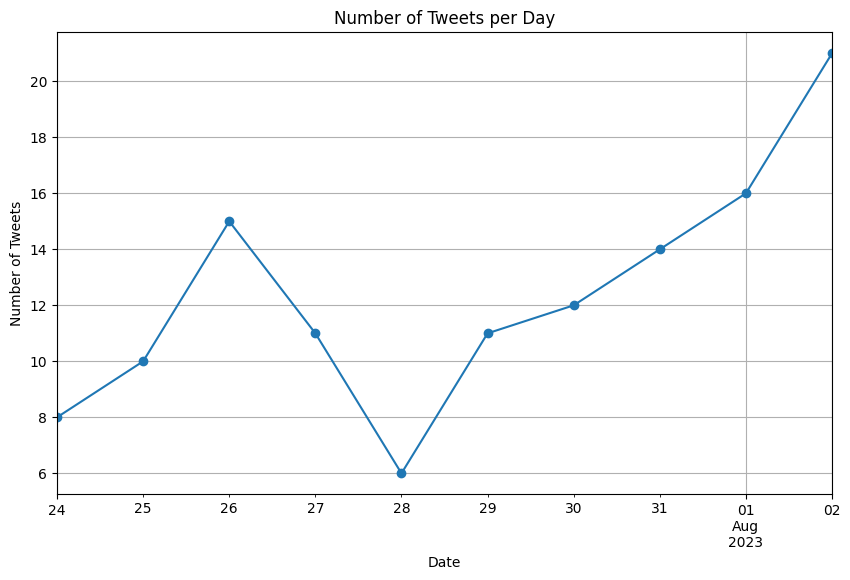

In [49]:
# Set the Timestamp column as the DataFrame index
print(data.head())
data['PostDate'] = pd.to_datetime(data['PostDate'])
data.set_index('PostDate', inplace=True)

# Resample the data by day and count the number of tweets per day
tweets_per_day = data.resample('D').size()

# Create a line plot
plt.figure(figsize=(10, 6))
tweets_per_day.plot(kind='line', marker='o')
plt.title('Number of Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

In [71]:
# Load the CSV data into a Pandas DataFrame
data = pd.read_csv("./data/preprocessed_data.csv")
data.head()
data['ER'] = (data['LikeCount'] + data['RetweetCount']) / data.shape[0]

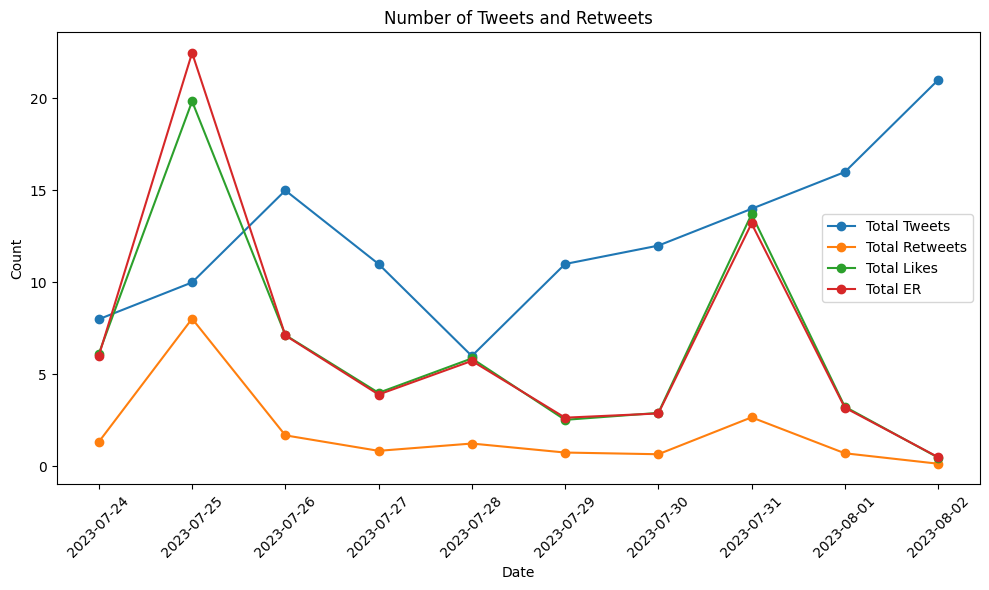

In [72]:
# Group by date and calculate the number of tweets and total retweets on each date
data['PostDate'] = pd.to_datetime(data['PostDate'])
data['RetweetCount'] = data['RetweetCount']/1000
data['LikeCount'] = data['LikeCount']/1000
data['ER'] = data['ER']/10
grouped = data.groupby(data['PostDate'].dt.date).agg(TotalTweets=('PreprocessedTweet', 'count'),
                                                  TotalRetweets=('RetweetCount', 'sum'),
                                                    TotalLikes=('LikeCount','sum'),
                                                    Engagments=('ER','sum'))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped['TotalTweets'], marker='o', label='Total Tweets')
plt.plot(grouped.index, grouped['TotalRetweets'], marker='o', label='Total Retweets')
plt.plot(grouped.index, grouped['TotalLikes'], marker='o', label='Total Likes')
plt.plot(grouped.index, grouped['Engagments'], marker='o', label='Total ER')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Tweets and Retweets')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

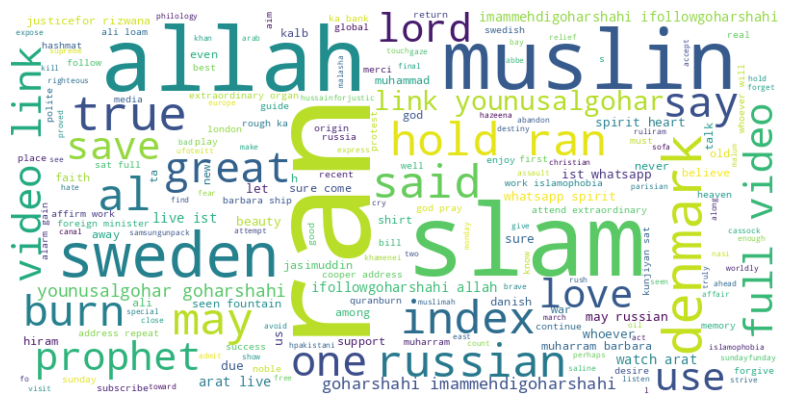

In [58]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all preprocessed tweets into a single string
all_tweets_text = ' '.join(data['PreprocessedTweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400,max_font_size=150, background_color='white').generate(all_tweets_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
